<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Interpolation using the excel data

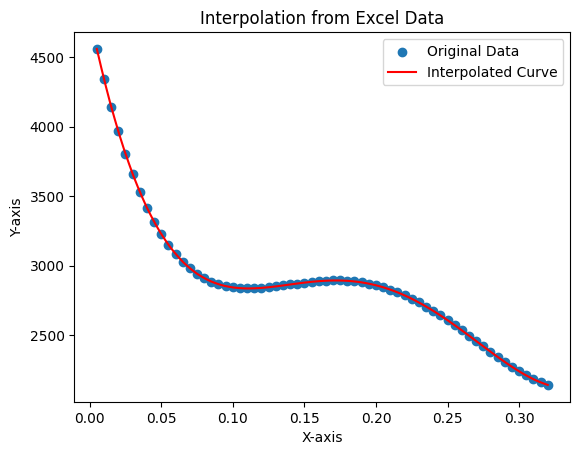

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain2']
y = df['Hardening2']

# Create an interpolation function (linear interpolation in this example)
interp_func = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = interp_func(x_new)

# Plot the original data and interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation from Excel Data')
plt.show()


#interp1d Interpolation


Cubic Polynomial Coefficients: [-431996.46665817  226270.1897492   -39288.5660006     4765.84361717]
Cubic Polynomial Equation: -431996.466658 x^3 + 226270.189749 x^2 + -39288.566001 x + 4765.843617


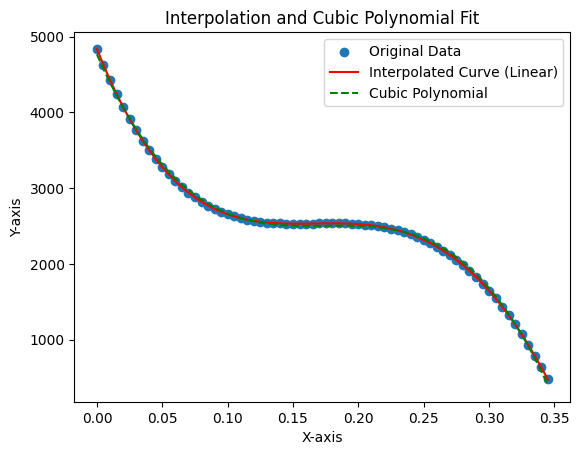

In [3]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)
# print(df)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Perform cubic spline interpolation
spline_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, 3)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Print the cubic polynomial equation
cubic_equation = f"{coefficients[0]:.6f} x^3 + {coefficients[1]:.6f} x^2 + {coefficients[2]:.6f} x + {coefficients[3]:.6f}"
print("Cubic Polynomial Equation:", cubic_equation)

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve (Linear)', color='red')
plt.plot(x_new, y_cubic, label='Cubic Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit')
plt.show()


# make_interp_spline Interpolation

Polynomial Coefficients: [ 4.44086486e+00  3.90926112e+05 -7.01736956e+05  2.85812859e+05
 -4.37778307e+04  4.83826340e+03]
Polynomial Equation: 4.440865 x^5 + 390926.111720 x^4 + -701736.956076 x^3 + 285812.858587 x^2 + -43777.830734 x^1 + 4838.263398


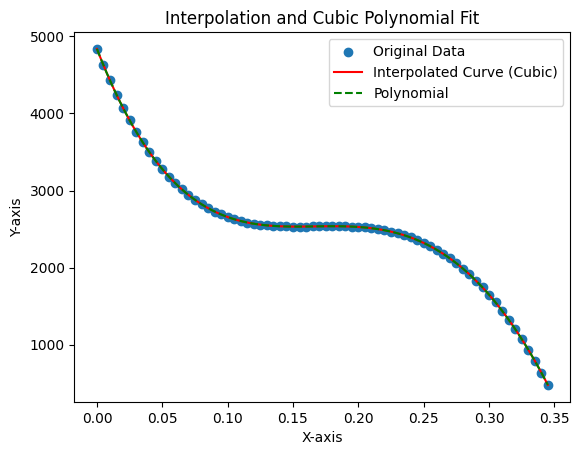

In [31]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d, make_interp_spline  # Import both interp1d and make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=5)  # Use make_interp_spline here

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, 5)

# Print the coefficients
print("Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve (Cubic)', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit')
plt.show()


# Interpolation + Equation + Derivative + Beta0

Cubic Polynomial Coefficients: [-1.43590533e-05  1.95938600e+06 -1.60916055e+06  4.43948682e+05
 -4.97768893e+04  4.79578708e+03]

Polynomial Equation: -0.000014 x^5 + 1959386.000010 x^4 + -1609160.548003 x^3 + 443948.681692 x^2 + -49776.889301 x^1 + 4795.787078

Derivative Equation: -0.000072 x^4 + 7837544.000041 x^3 + -4827481.644008 x^2 + 887897.363385 x^1 + -49776.889301

Roots (Zeros) of the Derivative Equation: [1.09165192e+11 3.33043679e-01 1.72079969e-01 1.10819515e-01]

For x = 109165191569.383041, y = 55652761790281783641668691608944602031608098193408.000000
For x = 0.333044, y = 2122.521960
For x = 0.172080, y = 2894.690601
For x = 0.110820, y = 2837.153080



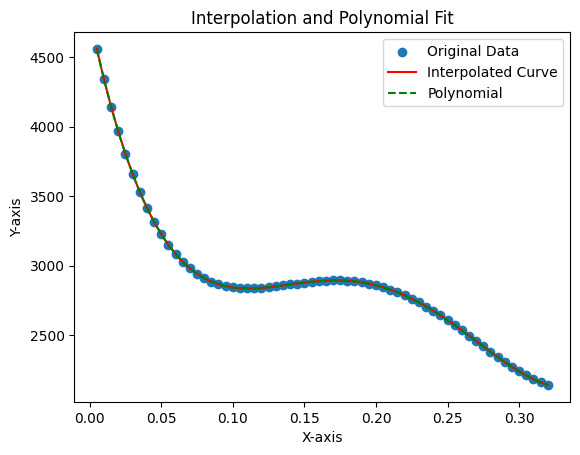

In [52]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

# Set the value of k for spline interpolation
k_value = 5

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{5-i} + " if i < 5 else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{4-i} + " if i < 4 else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


# Considering a part of graph

Cubic Polynomial Coefficients: [-662618.49261847  284588.36829837  -43765.53442113    4838.24541259]
Cubic Polynomial Equation: -662618.492618 x^3 + 284588.368298 x^2 + -43765.534421 x + 4838.245413


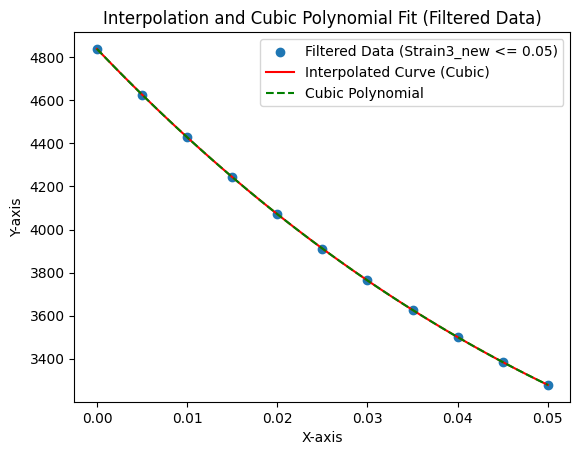

In [41]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Apply condition to filter data where Strain3_new <= 0.05
condition = x <= 0.05
x = x[condition]
y = y[condition]

# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=5)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the filtered dataset
coefficients = np.polyfit(x, y, 3)  # Changed to a cubic polynomial (degree 3) for consistency with the plotted curve

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Print the cubic polynomial equation
cubic_equation = f"{coefficients[0]:.6f} x^3 + {coefficients[1]:.6f} x^2 + {coefficients[2]:.6f} x + {coefficients[3]:.6f}"
print("Cubic Polynomial Equation:", cubic_equation)

# Plot the original filtered data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Filtered Data (Strain3_new <= 0.05)')
plt.plot(x_new, y_new, label='Interpolated Curve (Cubic)', color='red')
plt.plot(x_new, y_cubic, label='Cubic Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Cubic Polynomial Fit (Filtered Data)')
plt.show()


#Linear interpolation

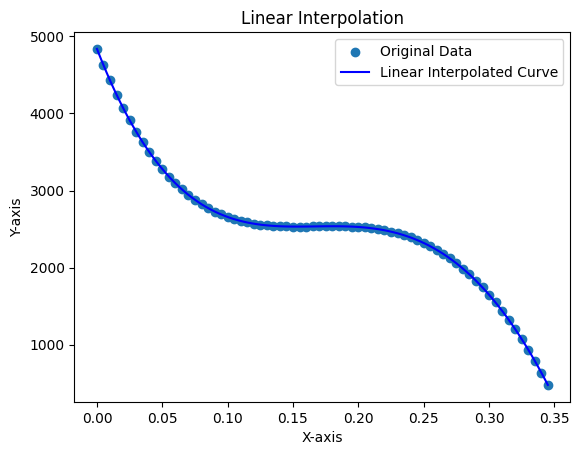

In [6]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/Material_Science/interpolation_test.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x = df['Strain3'].values
y = df['Hardening3'].values

# Perform linear interpolation
linear_interp = interp1d(x, y, kind='linear', fill_value="extrapolate")

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = linear_interp(x_new)

# Plot the original data and linearly interpolated curve
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Linear Interpolated Curve', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Linear Interpolation')
plt.show()
